<a href="https://colab.research.google.com/github/jimmyliao/HorusEye/blob/main/HorusEye.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Copyright 2024 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# The Eye of Horus: Image Generation and Detection by Vertex AI Imagen 3

<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/jimmyliao/HorusEye/blob/main/HorusEye.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Google Colaboratory logo"><br> Run in Colab
    </a>
  </td>   
  <td style="text-align: center">
    <a href="https://github.com/jimmyliao/HorusEye/blob/main/HorusEye.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
</table>

<div style="clear: both;"></div>

<b>Share to:</b>

<a href="https://www.linkedin.com/sharing/share-offsite/?url=https%3A//github.com/jimmyliao/HorusEye/blob/main/HorusEye.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/8/81/LinkedIn_icon.svg" alt="LinkedIn logo">
</a>

<a href="https://bsky.app/intent/compose?text=https%3A//github.com/jimmyliao/HorusEye/blob/main/HorusEye.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/7/7a/Bluesky_Logo.svg" alt="Bluesky logo">
</a>

<a href="https://twitter.com/intent/tweet?url=https%3A//github.com/jimmyliao/HorusEye/blob/main/HorusEye.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/53/X_logo_2023_original.svg" alt="X logo">
</a>

<a href="https://reddit.com/submit?url=https%3A//github.com/jimmyliao/HorusEye/blob/main/HorusEye.ipynb" target="_blank">
  <img width="20px" src="https://redditinc.com/hubfs/Reddit%20Inc/Brand/Reddit_Logo.png" alt="Reddit logo">
</a>

<a href="https://www.facebook.com/sharer/sharer.php?u=https%3A//github.com/jimmyliao/HorusEye/blob/main/HorusEye.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/51/Facebook_f_logo_%282019%29.svg" alt="Facebook logo">
</a>            


| | |
|-|-|
|Author(s) | [Jimmy Liao](https://github.com/jimmyliao) |
|Co-Author(s) | [Kevin Chiu](https://github.com/kevin6449) |
|Origin Author(s) | [Katie Nguyen](https://github.com/katiemn) |

## Overview

### Imagen 3

Imagen 3 on Vertex AI brings Google's state of the art generative AI capabilities to application developers. Imagen 3 is Google's highest quality text-to-image model to date. It's capable of creating images with astonishing detail. Thus, developers have more control when building next-generation AI products that transform their imagination into high quality visual assets. Learn more about [Imagen on Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs/image/overview).


In this tutorial, you will learn how to use the Google Gen AI SDK for Python to interact with the Imagen 3 and Imagen 3 Fast models to generate images showcasing:

- Photorealistic scenes
- Prompt enhancement
- Text rendered within images
- Quality and latency comparisons within the two models

## Get started


### Install Google Gen AI SDK for Python


In [2]:
%pip install --upgrade --quiet google-genai pillow

### Authenticate your notebook environment (Colab only)

If you are running this notebook on Google Colab, run the following cell to authenticate your environment.


In [3]:
import sys

if "google.colab" in sys.modules:
    from google.colab import auth

    auth.authenticate_user()

### Import libraries

In [4]:
from google import genai
from google.genai import types

### Set Google Cloud project information and create client

To get started using Vertex AI, you must have an existing Google Cloud project and [enable the Vertex AI API](https://console.cloud.google.com/flows/enableapi?apiid=aiplatform.googleapis.com).

Learn more about [setting up a project and a development environment](https://cloud.google.com/vertex-ai/docs/start/cloud-environment).

In [5]:
import os

PROJECT_ID = "[your-project-id]"  # @param {type: "string", placeholder: "[your-project-id]", isTemplate: true}
if not PROJECT_ID or PROJECT_ID == "[your-project-id]":
    PROJECT_ID = str(os.environ.get("GOOGLE_CLOUD_PROJECT"))

LOCATION = os.environ.get("GOOGLE_CLOUD_REGION", "us-central1")

client = genai.Client(vertexai=True, project=PROJECT_ID, location=LOCATION)

### Define a helper function

In [6]:
import typing

import IPython.display
from PIL import Image as PIL_Image
from PIL import ImageOps as PIL_ImageOps


def display_image(
    image,
    max_width: int = 600,
    max_height: int = 350,
) -> None:
    pil_image = typing.cast(PIL_Image.Image, image._pil_image)
    if pil_image.mode != "RGB":
        # RGB is supported by all Jupyter environments (e.g. RGBA is not yet)
        pil_image = pil_image.convert("RGB")
    image_width, image_height = pil_image.size
    if max_width < image_width or max_height < image_height:
        # Resize to display a smaller notebook image
        pil_image = PIL_ImageOps.contain(pil_image, (max_width, max_height))
    IPython.display.display(pil_image)

### Load the image generation models

Imagen 3: `imagen-3.0-generate-002`

<!-- Imagen 3 Fast: `imagen-3.0-fast-generate-001` -->

In [7]:
generation_model = "imagen-3.0-generate-002"
# generation_model_fast = "imagen-3.0-fast-generate-001"

### Imagen 3 & Imagen 3 Fast

With Imagen 3, you also have the option to use Imagen 3 Fast. These two model options give you the choice to optimize for quality and latency, depending on your use case.

**Imagen 3:** Generates high quality images with natural lighting and increased photorealism.

**Imagen 3 Fast:** Suitable for creating brighter images with a higher contrast. Overall, you can see a 40% decrease in latency in Imagen 3 Fast compared to Imagen 2.

With Imagen 3 and Imagen 3 Fast, you can also configure the `aspect ratio` to any of the following:
* 1:1
* 9:16
* 16:9
* 3:4
* 4:3

### Add image watermark

By default, a digital watermark, or [SynthID](https://deepmind.google/technologies/synthid/), is added to Imagen 3 images. If you would like to explicitly set the watermark to True, you can do so with the `add_watermark` parameter. You can also [verify a watermarked image](https://cloud.google.com/vertex-ai/generative-ai/docs/image/generate-images#watermark).

In [9]:
def generate_image(prompt, watermark=False):
    image = client.models.generate_images(
        model=generation_model,
        prompt=prompt,
        config=types.GenerateImagesConfig(
          number_of_images=1,
          aspect_ratio="1:1",
          enhance_prompt=True,
          safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
          person_generation="DONT_ALLOW",
          add_watermark=watermark,
        )
    )

    suffix_name = "_watermark" if watermark else ""

    image.generated_images[0].image._pil_image.save(f"./generated_image{suffix_name}.png")

    # Print the enhanced prompt
    print(image.generated_images[0].enhanced_prompt)
    display_image(image.generated_images[0].image)
    return image


A cozy, rustic house with a warm, inviting atmosphere, surrounded by a lush green garden. A large, old tree stands tall in the background, its branches reaching towards the sky. Sunlight streams through the windows, illuminating the interior of the house. Warm, muted orange tones dominate the color scheme. A small, charming porch with a rocking chair provides a perfect place to relax and enjoy the scenery. The image captures a sense of peace and tranquility, with the house and tree blending seamlessly with the natural surroundings. The photo has a cinematic feel, with soft lighting and a shallow depth of field, creating a sense of intimacy and inviting the viewer to imagine themselves relaxing in this cozy space. 


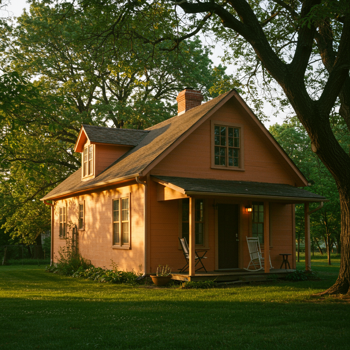

In [10]:
# Generate image with watermark
prompt = """
a cozzy house with a tree in the background
"""
image1 = generate_image(prompt, watermark=True)

A cozy, rustic house with a warm, inviting atmosphere, nestled amidst a lush green landscape. A large, old oak tree stands proudly in the background, its branches reaching towards the sky. The house has a charming, vintage aesthetic with a weathered wooden exterior, featuring a comfortable porch with rocking chairs. Sunlight streams through the windows, casting a soft, golden glow throughout the interior. The living room is filled with comfy furniture, such as plush sofas and armchairs, creating a sense of relaxation and warmth. A crackling fireplace provides a cozy ambiance, perfect for chilly evenings. The surrounding landscape is serene and tranquil, featuring a vast lawn and a garden with colorful flowers. The image is captured with a wide-angle lens, highlighting the house and its picturesque setting. The warm, natural lighting and muted color palette enhance the cozy and inviting atmosphere of this image.


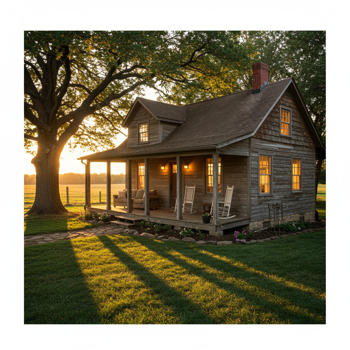

In [11]:
# Generate image without watermark
prompt = """
a cozzy house with a tree in the background
"""
image2 = generate_image(prompt, watermark=False)

In [12]:
import vertexai
from vertexai.preview.vision_models import (
    Image,
    WatermarkVerificationModel,
)

def check_watermark(image_path):
  input_file = image_path
  vertexai.init(project=PROJECT_ID, location=LOCATION)

  verification_model = WatermarkVerificationModel.from_pretrained(
    "imageverification@001"
    )

  image = Image.load_from_file(location=input_file)

  watermark_verification_response = verification_model.verify_image(image)

  print(
      f"Watermark verification result: {watermark_verification_response.watermark_verification_result}"
  )

In [13]:
image1 = "./generated_image_watermark.png"
check_watermark(image1)

Watermark verification result: ACCEPT


In [14]:
image2 = "./generated_image.png"
check_watermark(image2)

Watermark verification result: REJECT
